<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Named_Entity_Recognition_1%262Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 2**

In this part of the project, you will compare the output of two linguistic processing libraries (e.g., Stanza vs. Spacy). Using a given set of texts, you will run both libraries on these texts and report statistics on how often they (dis)agree with respect to the task of named entity recognition. For ease of comparison, ensure that both pipelines use the same tokenization.6 6 https://stanfordnlp.github. io/stanza/tokenize.html# start-with-pretokenized-text, https://spacy.io/api/doc#init You will use the data that you collected in Part 1. Minimally, your code should include the following functionalities and outputs.

In [44]:
import pandas as pd
import spacy

In [3]:
!pip install spacy
!pip install stanza

import stanza
stanza.download('en')
nlp_stanza = stanza.Pipeline('en', processors='tokenize,ner')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 20.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [6]:
import pandas as pd
import spacy

nlp_spacy = spacy.load('en_core_web_sm')
df1 = pd.read_csv('/content/cleaned_computer_sc.csv')
df2 = pd.read_csv('/content/cleaned_sculptors.csv')

# Concatenate the dataframes
df = pd.concat([df1, df2])

df.head()




,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan urdu عطا الرحمن خان comput...
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...
2,Computer_Scientists,Scott Aaronson,scott joel aaronson born may 21 1981 american ...
3,Computer_Scientists,Rediet Abebe,rediet abebe amharic ረድኤት አበበ ethiopian comput...
4,Computer_Scientists,Hal Abelson,harold abelson born april 26 1947 american mat...


In [7]:


def name_entity_extraction(text_chunk, spacy_model, stanza_model):
    # Process the text chunk with Spacy
    spacy_doc = spacy_model(text_chunk)
    spacy_entities = [(ent.text, ent.label_) for ent in spacy_doc.ents]

    # Process the text chunk with Stanza
    stanza_doc = stanza_model(text_chunk)
    stanza_entities = [(ent.text, ent.type) for ent in stanza_doc.ents]

    return spacy_entities, stanza_entities

# Apply the function to the DataFrame
df[['spacy_entities', 'stanza_entities']] = df['Content'].apply(lambda x: pd.Series(name_entity_extraction(x, nlp_spacy, nlp_stanza)))


In [8]:
df.head()

,Category,Name,Content,spacy_entities,stanza_entities
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan urdu عطا الرحمن خان comput...,"[(atta ur rehman khan, PERSON), (عطا, ORG), (خ...","[(stanford, ORG), (2, CARDINAL), (2010, DATE),..."
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...,"[(pancratius van der aalst, PERSON), (29, CARD...","[(29 january 1966, DATE), (1988, DATE), (1992,..."
2,Computer_Scientists,Scott Aaronson,scott joel aaronson born may 21 1981 american ...,"[(scott joel aaronson, PERSON), (21 1981, DATE...","[(scott joel aaronson, PERSON), (21 1981, DATE..."
3,Computer_Scientists,Rediet Abebe,rediet abebe amharic ረድኤት አበበ ethiopian comput...,"[(rediet abebe, PERSON), (ረድኤት, GPE), (ethiopi...","[(abebe, PERSON), (ethiopian, NORP), (ethiopia..."
4,Computer_Scientists,Hal Abelson,harold abelson born april 26 1947 american mat...,"[(harold abelson, PERSON), (april 26 1947, DAT...","[(harold abelson, PERSON), (april 26 1947, DAT..."


In [9]:
import json
entities_json = df[['spacy_entities', 'stanza_entities']].to_json(orient='records')

with open('named_entities.json', 'w') as f:
    json.dump(entities_json, f, indent=4)


Report basic statistics about the predicted set
of NEs by each package (i.e. Spacy vs Stanza). This should include:

In [10]:
avg_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).mean()
min_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).min()
max_spacy_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).max()
avg_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).mean()
min_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).min()
max_spacy_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).max()

print(f'Average spacy entities for Computer Scientists: {avg_spacy_ent_CS}')
print(f'Minimum spacy entities for Computer Scientists: {min_spacy_ent_CS}')
print(f'Maximum spacy entities for Computer Scientists: {max_spacy_ent_CS}')
print(f'Average spacy entities for Sculptors: {avg_spacy_ent_Sculptor}')
print(f'Minimum spacy entities for Sculptors: {min_spacy_ent_Sculptor}')
print(f'Maximum spacy entities for Sculptors: {max_spacy_ent_Sculptor}')


Average spacy entities for Computer Scientists: 84.7127659574468
Minimum spacy entities for Computer Scientists: 3
Maximum spacy entities for Computer Scientists: 664
Average spacy entities for Sculptors: 67.66315789473684
Minimum spacy entities for Sculptors: 5
Maximum spacy entities for Sculptors: 649


In [11]:
avg_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).mean()
min_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).min()
max_stanza_ent_CS = df[df['Category'] == 'Computer_Scientists']['spacy_entities'].apply(len).max()
avg_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).mean()
min_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).min()
max_stanza_ent_Sculptor = df[df['Category'] == 'Sculptors']['spacy_entities'].apply(len).max()

print(f'Average stanza entities for Computer Scientists: {avg_stanza_ent_CS}')
print(f'Minimum stanza entities for Computer Scientists: {min_stanza_ent_CS}')
print(f'Maximum stanza entities for Computer Scientists: {max_stanza_ent_CS}')
print(f'Average stanza entities for Sculptors: {avg_stanza_ent_Sculptor}')
print(f'Minimum stanza entities for Sculptors: {min_stanza_ent_Sculptor}')
print(f'Maximum stanza entities for Sculptors: {max_stanza_ent_Sculptor}')


Average stanza entities for Computer Scientists: 84.7127659574468
Minimum stanza entities for Computer Scientists: 3
Maximum stanza entities for Computer Scientists: 664
Average stanza entities for Sculptors: 67.66315789473684
Minimum stanza entities for Sculptors: 5
Maximum stanza entities for Sculptors: 649


Average/min/max number of words in each name entity per category per package.

In [12]:
import numpy as np

cs_spacy_entities = df[df['Category'] == 'Computer_Scientists']['spacy_entities']
words_per_entity = [len(entity[0].split()) for entities in cs_spacy_entities for entity in entities]
avg_spacy_words_perNE_CS = np.mean(words_per_entity)
min_spacy_words_perNE_CS = np.min(words_per_entity)
max_spacy_words_perNE_CS = np.max(words_per_entity)
print(f'Average number of words computed with spacy per name entity for Computer Scientists: {avg_spacy_words_perNE_CS}')
print(f'Minimum number of words computed with spacy per name entity for Computer Scientists: {min_spacy_words_perNE_CS}')
print(f'Maximum number of words computed with spacy per name entity for Computer Scientists: {max_spacy_words_perNE_CS}')



Average number of words computed with spacy per name entity for Computer Scientists: 1.6549039306793922
Minimum number of words computed with spacy per name entity for Computer Scientists: 1
Maximum number of words computed with spacy per name entity for Computer Scientists: 11


In [13]:

cs_stanza_entities = df[df['Category'] == 'Computer_Scientists']['stanza_entities']
words_per_entity_st = [len(entity[0].split()) for entities in cs_stanza_entities for entity in entities]
avg_stanza_words_perNE_CS = np.mean(words_per_entity_st)
min_stanza_words_perNE_CS = np.min(words_per_entity_st)
max_stanza_words_perNE_CS = np.max(words_per_entity_st)
print(f'Average number of words computed with stanza per name entity for Computer Scientists: {avg_stanza_words_perNE_CS}')
print(f'Minimum number of words computed with stanza per name entity for Computer Scientists: {min_stanza_words_perNE_CS}')
print(f'Maximum number of words computed with stanza per name entity for Computer Scientists: {max_stanza_words_perNE_CS}')



Average number of words computed with stanza per name entity for Computer Scientists: 1.3935734752353663
Minimum number of words computed with stanza per name entity for Computer Scientists: 1
Maximum number of words computed with stanza per name entity for Computer Scientists: 33


In [14]:
sculptor_spacy_entities = df[df['Category'] == 'Sculptors']['spacy_entities']
words_per_entity_ssp = [len(entity[0].split()) for entities in sculptor_spacy_entities for entity in entities]
avg_spacy_words_perNE_Sculpt = np.mean(words_per_entity_ssp)
min_spacy_words_perNE_Sculpt = np.min(words_per_entity_ssp)
max_spacy_words_perNE_Sculpt = np.max(words_per_entity_ssp)
print(f'Average number of words computed with spacy per name entity for Sculptors: {avg_spacy_words_perNE_Sculpt}')
print(f'Minimum number of words computed with spacy per name entity for Sculptors: {min_spacy_words_perNE_Sculpt}')
print(f'Maximum number of words computed with spacy per name entity for Sculptors: {max_spacy_words_perNE_Sculpt}')



Average number of words computed with spacy per name entity for Sculptors: 1.6745488487865587
Minimum number of words computed with spacy per name entity for Sculptors: 1
Maximum number of words computed with spacy per name entity for Sculptors: 17


In [15]:
sculptor_stanza_entities = df[df['Category'] == 'Sculptors']['stanza_entities']
words_per_entity_sst = [len(entity[0].split()) for entities in sculptor_stanza_entities for entity in entities]
avg_stanza_words_perNE_Sculpt = np.mean(words_per_entity_sst)
min_stanza_words_perNE_Sculpt = np.min(words_per_entity_sst)
max_stanza_words_perNE_Sculpt = np.max(words_per_entity_sst)
print(f'Average number of words computed with stanza per name entity for Sculptors: {avg_stanza_words_perNE_Sculpt}')
print(f'Minimum number of words computed with stanza per name entity for Sculptors: {min_stanza_words_perNE_Sculpt}')
print(f'Maximum number of words computed with stanza per name entity for Sculptors: {max_stanza_words_perNE_Sculpt}')



Average number of words computed with stanza per name entity for Sculptors: 1.3999328408327736
Minimum number of words computed with stanza per name entity for Sculptors: 1
Maximum number of words computed with stanza per name entity for Sculptors: 22


Statistics vizulaization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
'''avg_spacy_ent_CS
min_spacy_ent_CS
max_spacy_ent_CS
avg_spacy_ent_Sculptor
min_spacy_ent_Sculptor
max_spacy_ent_Sculptor
avg_stanza_ent_CS
min_stanza_ent_CS
max_stanza_ent_CS
avg_stanza_ent_Sculptor
min_stanza_ent_Sculptor
max_stanza_ent_Sculptor '''

'avg_spacy_ent_CS\nmin_spacy_ent_CS\nmax_spacy_ent_CS\navg_spacy_ent_Sculptor\nmin_spacy_ent_Sculptor\nmax_spacy_ent_Sculptor\navg_stanza_ent_CS\nmin_stanza_ent_CS\nmax_stanza_ent_CS\navg_stanza_ent_Sculptor\nmin_stanza_ent_Sculptor\nmax_stanza_ent_Sculptor '

In [17]:
data = {
    'Spacy CS': [min_spacy_ent_CS, avg_spacy_ent_CS, max_spacy_ent_CS],
    'Spacy Sculptor': [min_spacy_ent_Sculptor, avg_spacy_ent_Sculptor, max_spacy_ent_Sculptor],
    'Stanza CS': [min_stanza_ent_CS, avg_stanza_ent_CS, max_stanza_ent_CS],
    'Stanza Sculptor': [min_stanza_ent_Sculptor, avg_stanza_ent_Sculptor, max_stanza_ent_Sculptor]
}

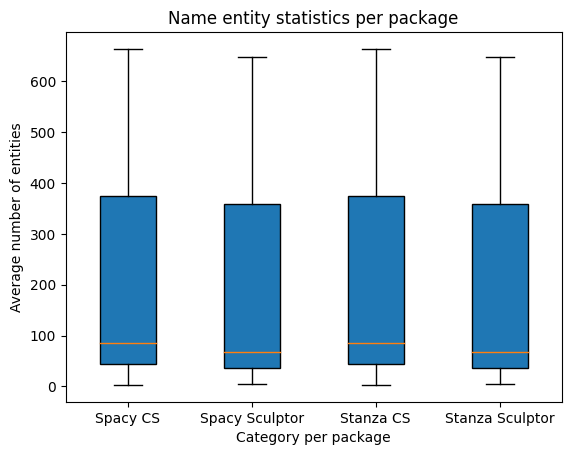

In [18]:
plt.boxplot(data.values(), vert=True, patch_artist=True, labels=data.keys())


plt.title('Name entity statistics per package')
plt.xlabel('Category per package')
plt.ylabel('Average number of entities')

# Display the plot
plt.show()

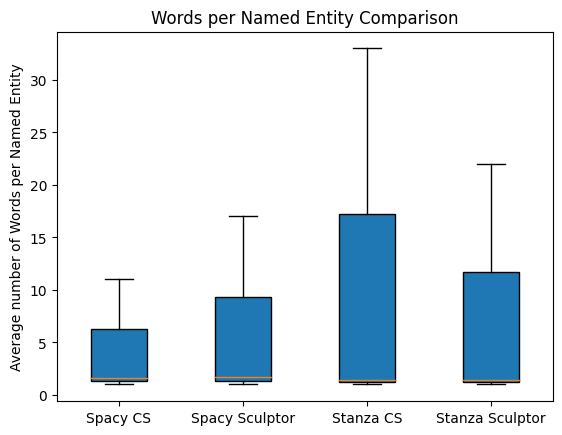

In [19]:
data = {
    'Spacy CS': [min_spacy_words_perNE_CS, avg_spacy_words_perNE_CS, max_spacy_words_perNE_CS],
    'Spacy Sculptor': [min_spacy_words_perNE_Sculpt, avg_spacy_words_perNE_Sculpt, max_spacy_words_perNE_Sculpt],
    'Stanza CS': [min_stanza_words_perNE_CS, avg_stanza_words_perNE_CS, max_stanza_words_perNE_CS],
    'Stanza Sculptor': [min_stanza_words_perNE_Sculpt, avg_stanza_words_perNE_Sculpt, max_stanza_words_perNE_Sculpt]
}


plt.boxplot(data.values(), vert=True, patch_artist=True, labels=data.keys())
plt.title('Words per Named Entity Comparison')
plt.ylabel('Average number of Words per Named Entity')

plt.show()

# 2. Analysis  by entity type

Function that chacks one doc for:
--perfectly overlaping name entities in stanza spacy
--partially overlapinf name entities
--NE detected only by spacy
--NE detected onlY by stanza
--NE that also have the same type

In [23]:
''''def ner_comparison(doc, spacy_model, stanza_model):
    # Tokenize the document using both Spacy and Stanza
    spacy_doc = spacy_model(doc)
    stanza_doc = stanza_model(doc)

    # Extract entity spans from both Spacy and Stanza
    spacy_entities = [(ent.start_char, ent.end_char, ent.label_) for ent in spacy_doc.ents]
    stanza_entities = [(ent.start_char, ent.end_char, ent.type) for sent in stanza_doc.sentences for ent in sent.ents]

    # Number of perfectly overlapping instances
    perfect_overlap_count = 0
    partial_overlap_count = 0
    type_agreement_count = 0


    for spacy_ent in spacy_entities:
        if spacy_ent in stanza_entities:

            type_agreement_count += 1




        for stanza_ent in stanza_entities:
            if spacy_ent[:1]== stanza_ent[:1]:
                perfect_overlap_count += 1
                break
            if (spacy_ent[0] < stanza_ent[1] and spacy_ent[0] > stanza_ent[0]) or (spacy_ent[1]>stanza_ent[0] and spacy_ent[1]<stanza_ent[1]):
                partial_overlap_count += 1
    predicted_only_spacy=len(spacy_entities)-perfect_overlap_count-partial_overlap_count
    predicted_only_stanza=len(stanza_entities)-perfect_overlap_count- partial_overlap_count


    return perfect_overlap_count, partial_overlap_count, predicted_only_spacy, predicted_only_stanza, type_agreement_count


# Document for NER comparison
doc = ("Apple Inc. is planning to open a new office in San Francisco. Tim Cook, the CEO of Apple, announced this during a press conference held at their headquarters in Cupertino, California. "
       "The new office is expected to create over 5,000 jobs and will be operational by the end of 2025. This move comes as part of Apple's expansion strategy, which also includes opening new retail stores in major cities like New York, London, and Tokyo.")

# Perform NER comparison
overlap_count = ner_comparison(doc, nlp_spacy, nlp_stanza)
print(overlap_count)''


(11, 2, 1, 1, 10)


In [ ]:


def ner_comparison(doc, spacy_model, stanza_model):
    # Tokenize the document using both Spacy and Stanza
    spacy_doc = spacy_model(doc)
    stanza_doc = stanza_model(doc)

    # Extract entity spans and types from both Spacy and Stanza
    spacy_entities = [(ent.start_char, ent.end_char, ent.label_) for ent in spacy_doc.ents]
    stanza_entities = [(ent.start_char, ent.end_char, ent.type) for sent in stanza_doc.sentences for ent in sent.ents]

    perfect_overlap_count = 0
    partial_overlap_count = 0
    same_type_overlap_count = 0

    # Check for perfect overlaps and same type overlaps
    for spacy_ent in spacy_entities:
        for stanza_ent in stanza_entities:
            if spacy_ent[:1] == stanza_ent[:1]:
                perfect_overlap_count += 1
                if spacy_ent[2] == stanza_ent[2]:
                    same_type_overlap_count += 1
                break
            elif (spacy_ent[0] < stanza_ent[1] and spacy_ent[0] > stanza_ent[0]) or (spacy_ent[1]< stanza_ent[1] and spacy_ent[1]> stanza_ent[0]):  # Check for partial overlap
                partial_overlap_count += 1

    # Entities only in Spacy and Stanza
    only_spacy = len(spacy_entities) - perfect_overlap_count
    only_stanza = len(stanza_entities) - perfect_overlap_count

    return perfect_overlap_count, partial_overlap_count, only_spacy, only_stanza, same_type_overlap_count


# Perform computations for 'Computer_scientists'
cs_results = df[df['Category'] == 'Computer_scientists']['Content'].apply(
    lambda x: pd.Series(ner_comparison(x, nlp_spacy, nlp_stanza))
)

# Perform computations for 'Sculptors'
sculptor_results = df[df['Category'] == 'Sculptors']['Content'].apply(
    lambda x: pd.Series(ner_comparison(x, nlp_spacy, nlp_stanza))
)

# Rename columns for clarity
cs_results.columns = ['perfect_overlap_CS', 'partial_overlap_CS', 'only_spacy_CS', 'only_stanza_CS', 'same_type_overlap_CS']
sculptor_results.columns = ['perfect_overlap_SC', 'partial_overlap_SC', 'only_spacy_SC', 'only_stanza_SC', 'same_type_overlap_SC']

# Save the DataFrames to CSV files
cs_results.to_csv('cs_results.csv', index=False)
sculptor_results.to_csv('sculptor_results.csv', index=False)


In [45]:
sculptor_results.head()

,perfect_overlap_SC,partial_overlap_SC,only_spacy_SC,only_stanza_SC,same_type_overlap_SC
0,20,0,61,10,17
1,5,0,9,2,4
2,97,0,127,18,88
3,17,1,25,5,14
4,16,3,26,0,11


In [43]:
cs_results.to_csv('cs_results.csv', index=False)
sculptor_results.to_csv('sculptor_results.csv', index=False)

Visualization: Overlap and analysis by entity type

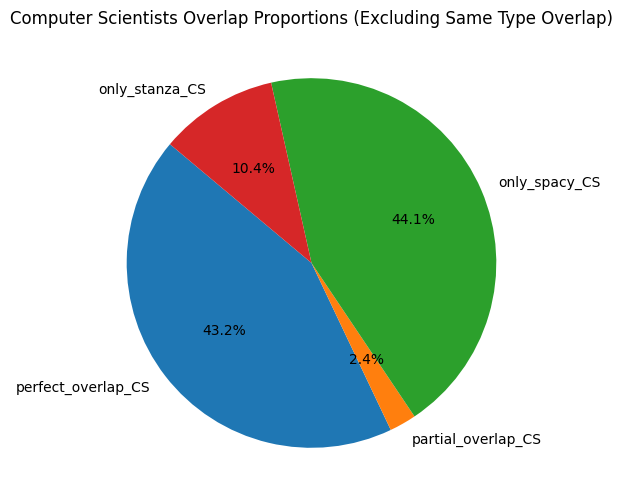

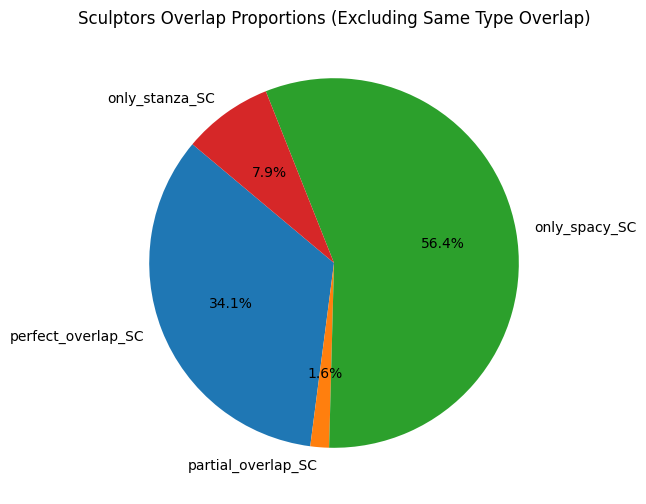

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
cs_results = pd.read_csv('cs_results.csv')
sculptor_results = pd.read_csv('sculptor_results.csv')

def plot_pie_chart_excluding_same_type(df, category):
    # Sum the counts for each metric
    data = df.sum().drop(labels=[col for col in df.columns if 'same_type_overlap' in col])

    # Plot pie chart
    data.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140)
    plt.title(f'{category} Overlap Proportions (Excluding Same Type Overlap)')
    plt.ylabel('')
    plt.show()

plot_pie_chart_excluding_same_type(cs_results, 'Computer Scientists')
plot_pie_chart_excluding_same_type(sculptor_results, 'Sculptors')




<ipython-input-53-b16c80824cd5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_overlap['Category'] = 'Computer Scientists'
<ipython-input-53-b16c80824cd5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sculptor_overlap['Category'] = 'Sculptors'


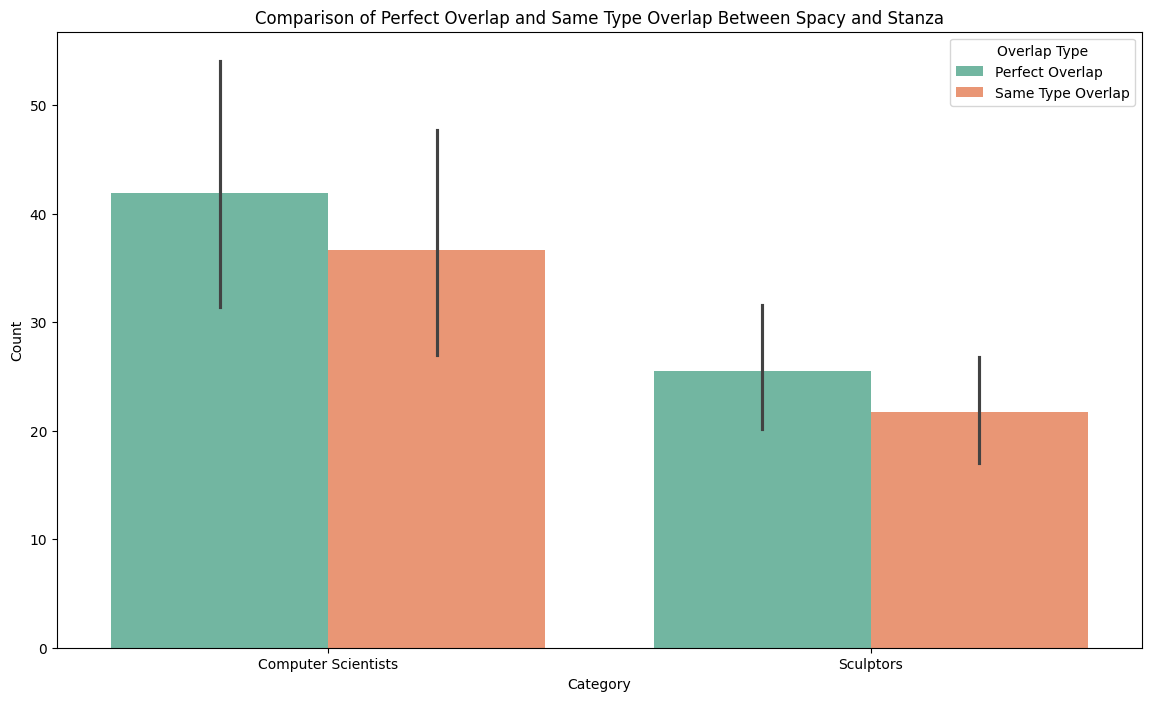

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cs_results and sculptor_results are already loaded DataFrames

# Extract the 'perfect_overlap' and 'same_type_overlap' columns for both categories
cs_overlap = cs_results[['perfect_overlap_CS', 'same_type_overlap_CS']]
sculptor_overlap = sculptor_results[['perfect_overlap_SC', 'same_type_overlap_SC']]

# Rename columns for clarity
cs_overlap.columns = ['Perfect Overlap', 'Same Type Overlap']
sculptor_overlap.columns = ['Perfect Overlap', 'Same Type Overlap']

# Add a new column to indicate the category
cs_overlap['Category'] = 'Computer Scientists'
sculptor_overlap['Category'] = 'Sculptors'

# Combine both DataFrames
combined_overlap = pd.concat([cs_overlap, sculptor_overlap])

# Melt the data for easy plotting with seaborn
melted_overlap = combined_overlap.melt(id_vars=['Category'], var_name='Overlap Type', value_name='Count')

# Plot the data using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_overlap, x='Category', y='Count', hue='Overlap Type', palette='Set2')
plt.title('Comparison of Perfect Overlap and Same Type Overlap Between Spacy and Stanza')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Overlap Type')
plt.show()
